In [11]:
import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 4

train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

net = Net()

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.635
[1,  4000] loss: 0.752
[1,  6000] loss: 0.642
[1,  8000] loss: 0.598
[1, 10000] loss: 0.559
[1, 12000] loss: 0.539
[1, 14000] loss: 0.509
[2,  2000] loss: 0.463
[2,  4000] loss: 0.451
[2,  6000] loss: 0.431
[2,  8000] loss: 0.428
[2, 10000] loss: 0.417
[2, 12000] loss: 0.418
[2, 14000] loss: 0.403
Finished Training


In [15]:
correct = 0
total = 0

y_true = []
y_pred = []

with torch.no_grad():
    for data in testloader:
        inputs, labels = data

        y_true += labels
        outputs = net(inputs)
        # class with the highest energy = predicted class
        _, predicted = torch.max(outputs.data, 1)
        y_pred += predicted

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network test images: %d %%' % (100 * correct / total))
print('Correct: %d / %d' % (correct, total))

Accuracy of the network test images: 85 %
Correct: 8595 / 10000


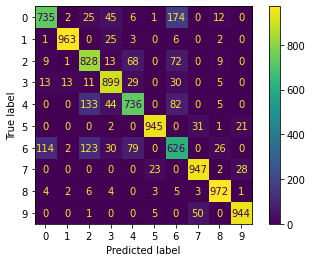

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()